# HW 1- Molecular Spectroscopy of Tetracene

iPython notebook uses cells to define code and text as well as many other things. You can insert cells using the insert menu. To edit a cell, you double click on it. The cells are either Markdown or Code as defined in the pull-down menu above. This cell is a Markdown cell. To edit it, you must double click on it. When you are done editing, you can run the cell using the run symbol just above here or the different run choices in the Cell menu Markdown allows you to describe the code like what I am doing in this cell. Code cells contains the script that runs the routines. The next cell is a code cell. You can insert exmplanatory text using a # symbol as shown in the following cell. To execute the code, you must run it. To run a particular cell, you must have already run the cells that contain information for your particular cell. 

In [2]:
# In code cells, the # sign designates explanitory text, not code
# We first import libraries of iPython routines that provide powerful tools for plotting graphs and performing mathematical operations. 
import matplotlib
import matplotlib.pyplot as plt                         # importing the pyplot routine in matplotlib and calling it plt
%matplotlib inline                                             
# the % designates a magic command in Juptyer notebook. They are shortcuts that simplify coding. 
# The inline function in the matplotlib library creates graphs in the same cell that defined the graph 
matplotlib.rcParams['figure.figsize'] = [9, 6]     # rcParams is a routine in matplotlib that defines different
                                                                        # parameters for creating a figure. figsize defines the size of the graph
matplotlib.rcParams['font.size'] = 11                # font.size defines the size of the font in graphs
import numpy as np                                        # importing the numpy library of mathematical operations and renaming them np
import scipy.integrate as integrate   # SciPy provides more capabilities. Here we are calling the integration library of the SciPy library and calling it integrate
from scipy.special import hermite

In [3]:
wavelength=np.linspace(350,650,200)    # linspace is a numpy command that creates a vector array of 200 points from 35  to 650
vib_freq=1000                                          # defining a variable. In this case, the variable is wave numbers (cm-1)
q=np.linspace(-10,10,100)
omega=10**7/wavelength                       # the ** is an exponential
xg= 0
xe= 1
# The meaning of these variables is problem 1a below

# Next, define the Hermite polynomials needed for the Franck Condon factors
def psi_0(x):                                           # Here we define  a function that uses an argument, x. What follows the colon defines the function.
    v=0
    return(1/(np.sqrt(2**v*np.math.factorial(v))))*np.exp(-x**2/2)
def psi_1(x):
    v=1
    return(1/(np.sqrt(2**v*np.math.factorial(v))))*(2*x)*np.exp(-x**2/2)
def psi_2(x):
    v=2
    return(1/(np.sqrt(2**v*np.math.factorial(v))))*(4*x**2-2)*np.exp(-x**2/2)
def psi_3(x):
    v=3
    return(1/(np.sqrt(2**v*np.math.factorial(v))))*(8*x**3-12*x)*np.exp(-x**2/2)
def psi_4(x):
    v=4
    return(1/(np.sqrt(2**v*np.math.factorial(v))))*(16*x**4-48*x**2+12)*np.exp(-x**2/2)
def psi_5(x):
    v=5
    return(1/(np.sqrt(2**v*np.math.factorial(v))))*(32*x**5-160*x**3+120*x)*np.exp(-x**2/2)
def psi_6(x):
    v=6
    return(1/(np.sqrt(2**v*np.math.factorial(v))))*(64*x**6-480*x**4+720*x**2-120)*np.exp(-x**2/2)

# Defining the Lorentzian line shape function
def L(freq,gamma):                                                    
    return(gamma/((freq-omega)**2+gamma**2))
f = lambda q: psi_0(q)*psi_0(q+xe)                         
# lambda is a special Python function called an anonymous function. Its format defines the variable, q, and the function is defined after the colon. 
# In this case, the function is a product of two functions called psi. The explaination of why these two psi values were chosen is problem 1c below.
FC_0 = integrate.quad(f, -10, 10)        # Here we are using the quad function from the scipy.integrate library to perform the 1D quadrature integration.                                           
f = lambda q: psi_0(q)*psi_1(q+xe)                   # The result of the integration is returned as a tuple, i.e. an list immutible list containing the result of 
FC_1 = integrate.quad(f, -10, 10)                       # integration and the error. Thus. FC_i will be an array of two and to use it in a calculation, you need to p
f = lambda q: psi_0(q)*psi_2(q+xe)                  # pick the first element, i.e. FC_i[0]. 
FC_2 = integrate.quad(f, -10, 10)
f = lambda q: psi_0(q)*psi_3(q+xe)
FC_3 = integrate.quad(f, -10, 10)
f = lambda q: psi_0(q)*psi_4(q+xe)
FC_4 = integrate.quad(f, -10, 10)
f = lambda q: psi_0(q)*psi_5(q+xe)
FC_5 = integrate.quad(f, -10, 10)
f = lambda q: psi_0(q)*psi_6(q+xe)
FC_6 = integrate.quad(f, -10, 10) 
omega_e = 10**7/520                                     # converting 520 nm to wave numbers
gamma = 800
A = L(omega_e + 0 * vib_freq, gamma)*FC_0[0]\
            +L(omega_e + 1 * vib_freq, gamma)*FC_1[0]\
            +L(omega_e + 2 * vib_freq, gamma)*FC_2[0]\
            +L(omega_e + 3 * vib_freq, gamma)*FC_3[0]\
            +L(omega_e + 4 * vib_freq, gamma)*FC_4[0]\
            +L(omega_e + 5 * vib_freq, gamma)*FC_5[0]\
            +L(omega_e + 6 * vib_freq, gamma)*FC_6[0]\
                                                                              # These slashes mean continue the line
Max = max(A)                                    # max is a Python function for finding the maximum value
Abs = A/Max




(0, 1)

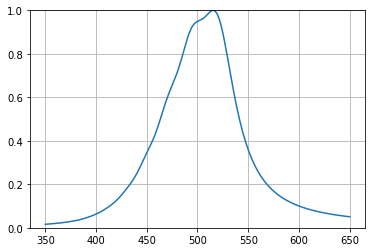

In [4]:
plt.plot(wavelength,Abs)           # plot the absorption spectrum
plt.grid()
plt.ylim(0, 1)

In [5]:
# The code provided above used explicit functions for the Hermite polynomials. You can also use the Hermite polynomial function in the SciPy library.
# The following code was developed by a class member and used to display the individual vibronic contributions to the absorption spectrum.
# It is included here as an example of more powerful code that can be used when there are a large number of vibronic transitions such as the 
# calculation of the iodine absorption spectrum.

def psi(x, v):
    """Generate a wavefunction.
    
    Parameters
    ----------
    x: scalar or ndarray
        Coordinate of evaluation
    v: int
        Vibrational quantum number
    """
    return np.exp(-x  ** 2 / 2)/np.sqrt((2. ** v) * np.math.factorial(v))*hermite(v)(x)


def lorentzian(freq, gamma, omega):
    return(gamma/((freq-omega)**2+gamma**2))

def overlap(q, xg, xe, v_ground, v_excited):
    return psi(q + xg, v_ground) * psi(q + xe, v_excited)

1a) Page 7 of the  notes show a configuration coordinate diagram for a molecule. The code written above contains the variables `xg` and `xe`. What is the connection betwen these variables and the configuration coordinate diagram in the notes?

`xg` and `xe` represent the offset of the centers of the ground state and excited electronic state in the Nuclear Coordinate system (q-space)

`xg` is often assumed to be `0`, but really only the difference between the two matters.
This difference is the difference between the centers of the two wells. The Notes show a Morse potential well, here we are assuming a pure harmonic oscillator.

b)  Graph the wave functions for the first three vibrational states in the ground electronic state and the excited electronic state. Compare them with what you see in the notes.

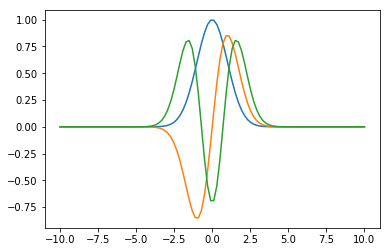

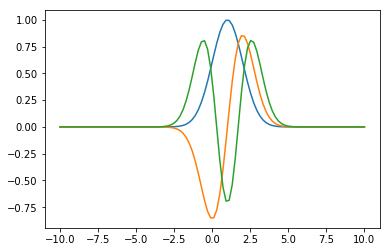

In [6]:
for i in range(3):
    plt.plot(q, psi(q,i))
plt.figure()
for i in range(3):
    plt.plot(q, psi(q-xe,i))

The two sets of wave functions are identical, except that the excited state are offset by `xe`.
Note that I flipped the sign of the offset so the graphs match the notes, but the sign convention is fairly arbitrary, especially when we only care about the magnitude of the overlap.
   * `psi(q,0)` is a single positive peak
   * `psi(q,1)` is a negative peak and positive peak with a node in the middle
   * `psi(q,2)` is a negative peak between two positive peaks with a nodes in the middle
   
The peaks agree with what is in the notes, but show more of the baseline. The exact peak height is difficult to compare, but I'd say the peaks appear sharper in this representation.

c)  The code contains the function - `psi_0(q)*psi_3(q+xe)`. Relate this function to the equations in the notes. Make sure you include the `0` and `xe` in your discussion of the relationship. 

This is the overlap of the wave function of the ground state with no vibrational quanta (phi_0) with the excited state (indicated by the offset `xe`) with 3 vibrational quanta. This is integrated from -inf to inf to get the overlap and the magnitude squared of the overlap integral is the Franck-Condon factor.
This appears as the middle term in the definition of the absorption cross section in the notes.
`xe` is the offset of the excited state in q-space. It's units are arbitrary.

d) Modify the code to simulate the absoption spectrum of tetracene (see page 7 of the notes for the absorption spectrum).

See blue line below


e) Modify the code to simulate the fluorescence spectrum of tetracene.

See orange line below

In [7]:
wavelength = np.linspace(350,650,1000)
vib_freq = 1400#1386
q = np.linspace(-10,10,100)
omega = 1e7/wavelength
xg = 0
xe = 1.3

omega_e = 1e7/475
omega_e_fl = 1e7/477
gamma = 275

n_vibrational_levels = 15

In [8]:
# Compute the Franck-Condon factors
# range(x) generates the sequence [0, 1, 2, 3, 4, ..., x-1] (i.e. x numbers from 0 to x-1)
# Here, we are doing a computation for each value of ``i`` from 0 to n_vibrational_levels-1, inclusive
franck_condon = []
for i in range(n_vibrational_levels):
    # integrate.quad computes a definite integral of a function, with the lower and upper bounds
    # Additional arguments to the function are supplied by the keword argument `args`
    # integrate.quad returns two numbers, but we are only interested in the first (hence the `[0]`)
    #    More information can be found here: https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html
    franck_condon.append(abs(integrate.quad(overlap, -np.inf, np.inf, args=(xg,xe,0,i))[0])**2)

In [9]:
franck_condon_fl = []
for i in range(n_vibrational_levels):
    franck_condon_fl.append(abs(integrate.quad(overlap, -np.inf, np.inf, args=(xg,xe,i,0))[0])**2)

In [10]:
# Compute the absorbance as the sum of several lorentzians, shifted by their vibrational energy
#    and scaled by their Franck-Condon factor
absorbance = np.zeros_like(omega)
for i in range(n_vibrational_levels):
    absorbance += lorentzian(omega_e + i * vib_freq, gamma, omega)*franck_condon[i]*omega
# note that the += symbol is an operator that adds the results of a calculation onto the results of the previous calculation. -=, *=, and /= do similar things.
    
# Normalize 
absMax = absorbance.max()
absorbance /= absMax

florescence = np.zeros_like(omega)
for i in range(n_vibrational_levels):
    florescence += lorentzian(omega_e_fl - i * vib_freq, gamma, omega)*franck_condon[i]*omega
# note that the += symbol is an operator that adds the results of a calculation onto the results of the previous calculation. -=, *=, and /= do similar things.
    
# Normalize 
flMax = florescence.max()
florescence /= flMax

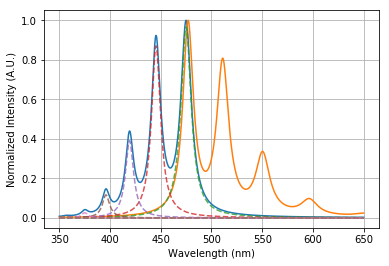

In [11]:

# Plot the absorption spectrum
#plt.plot(wavelength,absorbance)
plt.plot(wavelength,absorbance)

plt.plot(wavelength,florescence)

for i in range(n_vibrational_levels):
    alpha = 0.8                                               #alpha is one of the many arguments and key word arguments used to control the plot routine. 
    if i > 6:                                                      #It adjusts the transparency of a line in the graph. 0 is transparent and 1 is opaque.
        alpha = 0.3                                           # Detailed instructions appear at https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html
    plt.plot(wavelength, omega * lorentzian(omega_e + i * vib_freq, gamma, omega) * 
             franck_condon[i] / absMax, '--', alpha=alpha)
    
plt.xlabel("Wavelength (nm)")
plt.ylabel("Normalized Intensity (A.U.)")
plt.grid()

In [12]:
print(franck_condon)

[1.3494942408503157, 1.140322633518501, 0.48178631266156313, 0.1357031447330082, 0.028667289324850957, 0.0048447718958993195, 0.0006823053753391528, 8.23640060230856e-05, 8.69969813618812e-06, 8.168049916755663e-07, 6.902002179656818e-08, 5.30199258346281e-09, 3.7334864441757145e-10, 2.4267661887798855e-11, 1.4647267352803542e-12]


In [13]:
np.e**(-1.3**2/4)

0.6554062543268405

In [14]:
_

0.6554062543268405